In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [113]:
logpath = '/Users/luis/Desktop/Cranmer2024/Workplace/smallMutations/similar-expressions/src/dev/SR_loss_logging/logs'
fpath = os.path.join(logpath, sorted([fname for fname in os.listdir(logpath) if fname.endswith('.csv')])[-2])
print(f'{fpath=}')
df = pd.read_csv(fpath)

df['loss_diff'] = df['loss_after'] - df['loss_before']
df['score_diff'] = df['score_after'] - df['score_before']

df['is_inf'] = np.isinf(df.score_after) | np.isinf(df.loss_after)

print(f'{df.shape=}')

df.head()

fpath='/Users/luis/Desktop/Cranmer2024/Workplace/smallMutations/similar-expressions/src/dev/SR_loss_logging/logs/sr_logs_2025-04-03_16-11-09.csv'
df.shape=(147335, 14)


,timestamp,mutation_type,num_evals,attempts,loss_before,loss_after,score_before,score_after,successful_mutation,mutation_accepted,result_reason,loss_diff,score_diff,is_inf
0,1.743689e+09,mutate_operator,1,1,131860.05,inf,0.939986,inf,True,False,annealing_or_frequency,inf,inf,True
1,1.743689e+09,neural_mutate_tree,1,1,136374.83,136374.83,0.972171,0.972171,True,True,pass,0.00,0.000000,False
2,1.743689e+09,mutate_operator,1,1,136374.83,136371.60,0.972171,0.972147,True,True,pass,-3.23,-0.000023,False
3,1.743689e+09,insert_node,1,1,136371.60,139618.94,0.972147,0.995297,True,True,pass,3247.34,0.023149,False
4,1.743689e+09,rotate_tree,1,1,136374.83,139575.80,0.972171,0.994989,True,True,pass,3200.97,0.022819,False


In [114]:
# Show results reason by mutation count
# Get counts by mutation type and result reason
counts_df = df.groupby('mutation_type')['result_reason'].value_counts().unstack().fillna(0)

# Add sum of each mutation type
counts_df['sum'] = counts_df.sum(axis=1)

# Calculate ratios
ratio_df = (counts_df.div(counts_df['sum'], axis=0)*100).round(2)

# Display counts and ratios
print("Counts:")
display(counts_df)
print("\nRatios:")
display(ratio_df)

Counts:


result_reason,annealing_or_frequency,failed_constraint_check,pass,sum
mutation_type,,,,
add_node,790.0,0.0,391.0,1181.0
delete_node,1906.0,0.0,3608.0,5514.0
do_nothing,0.0,0.0,7289.0,7289.0
insert_node,23872.0,1.0,13685.0,37558.0
mutate_constant,55.0,0.0,185.0,240.0
mutate_operator,13643.0,0.0,40439.0,54082.0
neural_mutate_tree,1840.0,0.0,15130.0,16970.0
randomize,86.0,0.0,40.0,126.0
rotate_tree,4503.0,0.0,19758.0,24261.0



Ratios:


result_reason,annealing_or_frequency,failed_constraint_check,pass,sum
mutation_type,,,,
add_node,66.89,0.0,33.11,100.0
delete_node,34.57,0.0,65.43,100.0
do_nothing,0.00,0.0,100.00,100.0
insert_node,63.56,0.0,36.44,100.0
mutate_constant,22.92,0.0,77.08,100.0
mutate_operator,25.23,0.0,74.77,100.0
neural_mutate_tree,10.84,0.0,89.16,100.0
randomize,68.25,0.0,31.75,100.0
rotate_tree,18.56,0.0,81.44,100.0


In [121]:
df.mutation_type.unique()

array(['mutate_operator', 'neural_mutate_tree', 'insert_node',
       'rotate_tree', 'do_nothing', 'delete_node', 'add_node', 'simplify',
       'mutate_constant', 'randomize', 'swap_operands'], dtype=object)

In [120]:
(df[df.is_inf].groupby('mutation_type').size() / df.groupby('mutation_type').size()*100).round(2)

mutation_type
add_node               5.59
delete_node            1.20
do_nothing              NaN
insert_node            4.18
mutate_constant         NaN
mutate_operator        2.83
neural_mutate_tree     0.18
randomize             15.87
rotate_tree            1.94
simplify                NaN
swap_operands           NaN
dtype: float64

In [116]:
df[~df.is_inf].groupby('mutation_type').loss_diff.median()

mutation_type
add_node               5588.27000
delete_node            4781.05350
do_nothing                0.00000
insert_node            2022.57000
mutate_constant         286.75000
mutate_operator        3962.76900
neural_mutate_tree        0.00000
randomize             65646.51250
rotate_tree             224.71562
simplify                  0.00000
swap_operands             0.00000
Name: loss_diff, dtype: float64

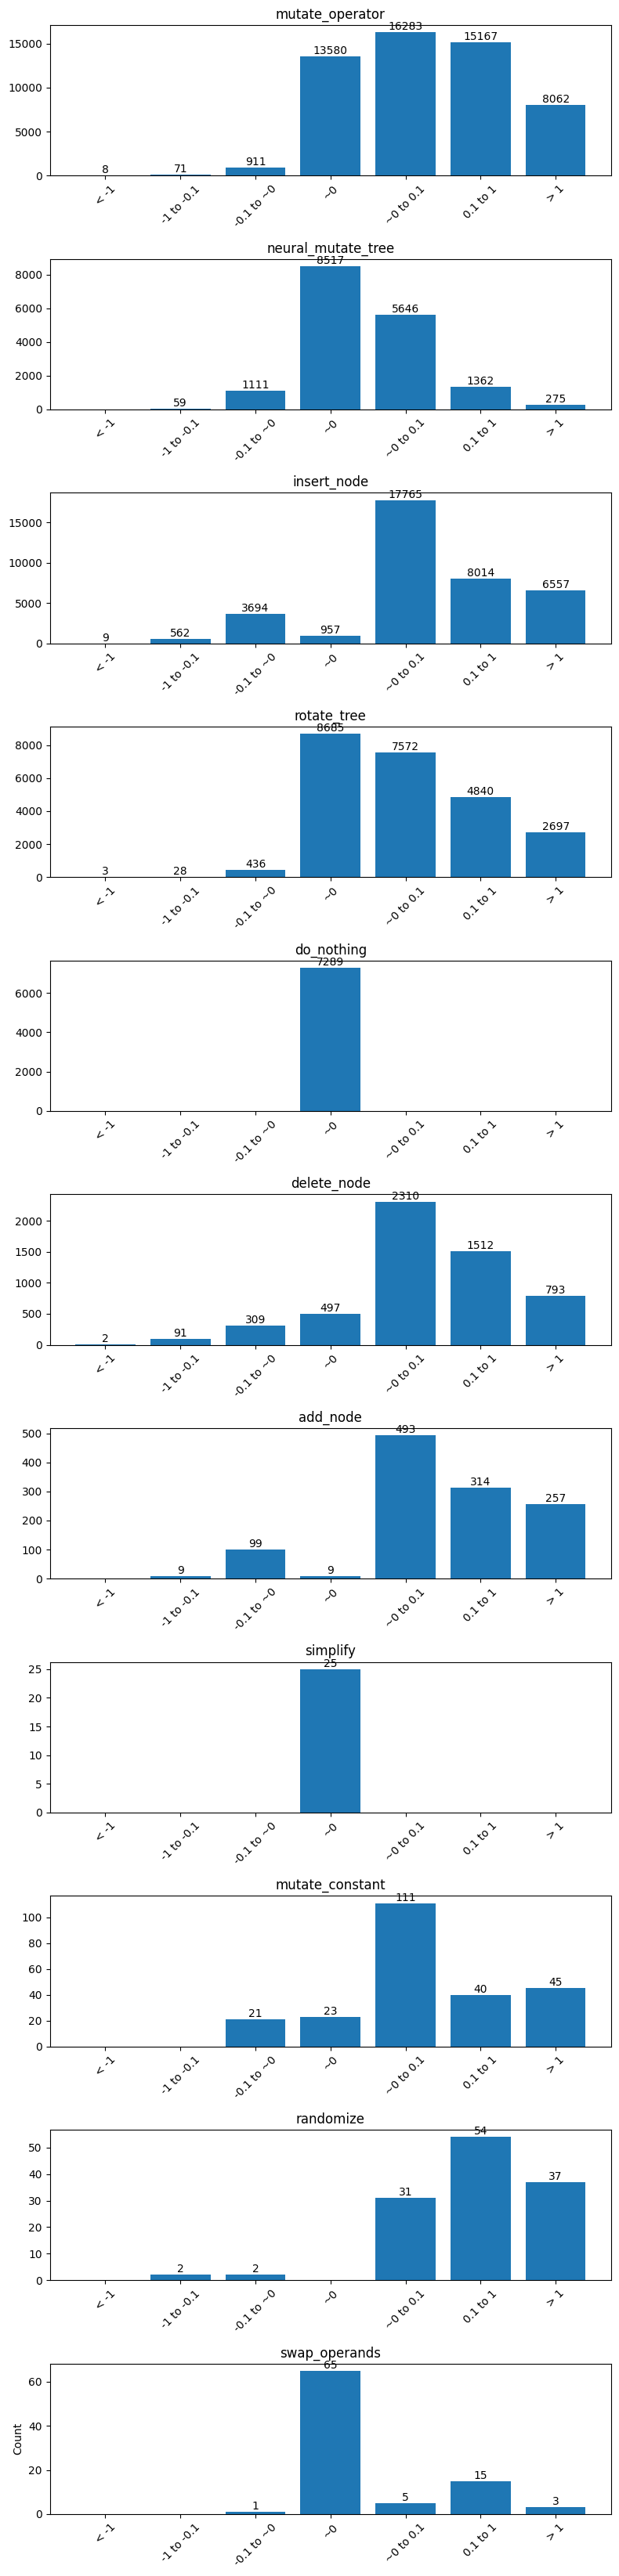

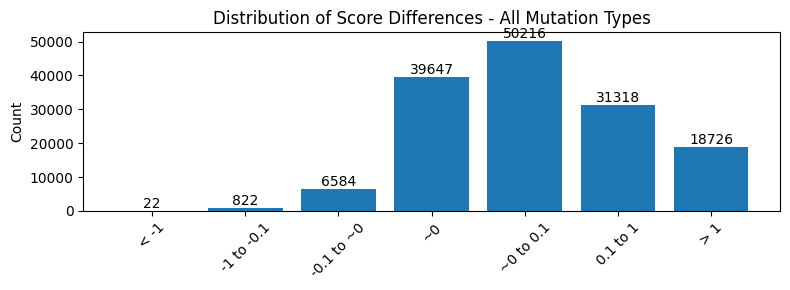

In [117]:
# Create histogram with custom bin boundaries for score differences
col = 'score_diff'

# Define custom bin boundaries with specific thresholds
bins = [-np.inf, -1, -0.1, -1e-12, 1e-12, 0.1, 1, np.inf]
bin_labels = ['< -1', '-1 to -0.1', '-0.1 to ~0', '~0', '~0 to 0.1', '0.1 to 1', '> 1']

# Create a figure with subplots for each mutation type
mutation_types = df['mutation_type'].unique()
n_mutations = len(mutation_types)
fig, axes = plt.subplots(nrows=n_mutations, figsize=(8, 3*n_mutations))

# For each mutation type, create a histogram
for i, mutation_type in enumerate(mutation_types):
    # Filter data for this mutation type
    mutation_df = df[df['mutation_type'] == mutation_type]
    
    # Count values in each bin
    hist, _ = np.histogram(mutation_df[col], bins=bins)
    
    # Plot the histogram
    ax = axes[i]
    ax.bar(range(len(hist)), hist, tick_label=bin_labels)
    plt.ylabel('Count')
    ax.set_title(f'{mutation_type}')
    ax.tick_params(axis='x', rotation=45)
    
    # Add bin counts as text on the plot
    for j, count in enumerate(hist):
        if count > 0:  # Only show non-zero counts
            ax.text(j, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Also create an overall histogram for all mutation types combined
plt.figure(figsize=(8, 3))
hist, _ = np.histogram(df[col], bins=bins)
plt.bar(range(len(hist)), hist, tick_label=bin_labels)
plt.ylabel('Count')
plt.title('Distribution of Score Differences - All Mutation Types')
plt.xticks(rotation=45)

# Add bin counts as text
for j, count in enumerate(hist):
    if count > 0:
        plt.text(j, count, str(count), ha='center', va='bottom')
        
plt.tight_layout()
plt.show()

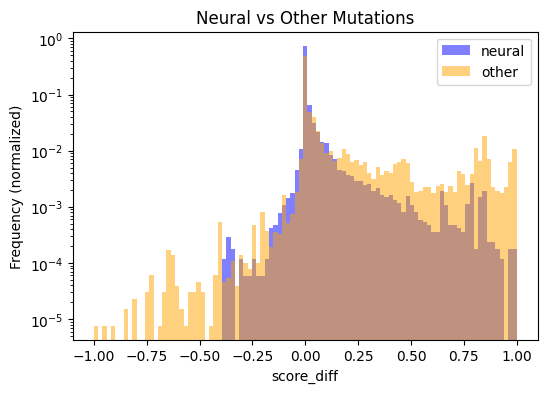

In [119]:
a, n = 1, 100
col = 'score_diff'

# Compare neural_mutate_tree with other mutation types
neural_df = df[df.mutation_type == 'neural_mutate_tree']
other_df = df[df.mutation_type != 'neural_mutate_tree']

# Get counts for normalization
neural_count = len(neural_df)
other_count = len(other_df)

# Plot score differences normalized by count
plt.figure(figsize=(6, 4))
bins = np.linspace(-a, a, n)
plt.hist(neural_df[col], bins=bins, alpha=0.5, label='neural', color='blue', 
         weights=np.ones(neural_count)/neural_count)
plt.hist(other_df[col], bins=bins, alpha=0.5, label='other', color='orange', 
         weights=np.ones(other_count)/other_count)
plt.yscale('log')
plt.legend()
plt.xlabel(col)
plt.ylabel('Frequency (normalized)')
plt.title('Neural vs Other Mutations')
plt.show()

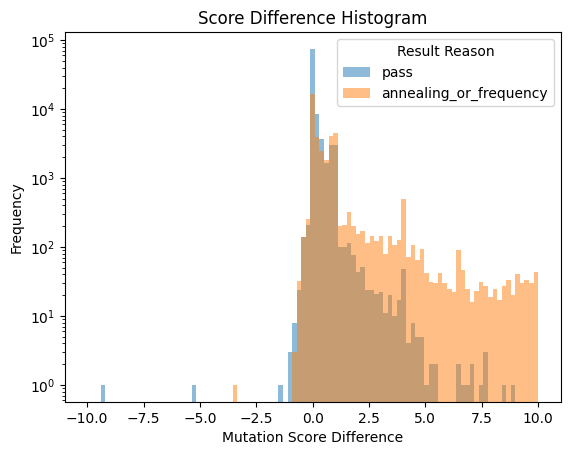

In [20]:
col = 'score_diff'
a, n = 10, 100
bins = np.linspace(-a, a, n)

plt.hist(df[df.result_reason == 'pass'][col], bins=bins, alpha=0.5, label='pass')
plt.hist(df[df.result_reason == 'annealing_or_frequency'][col], bins=bins, alpha=0.5, label='annealing_or_frequency')
plt.legend(title='Result Reason')
plt.yscale('log')
plt.xlabel('Mutation Score Difference')
plt.ylabel('Frequency')
plt.title('Score Difference Histogram')
plt.show()

pass

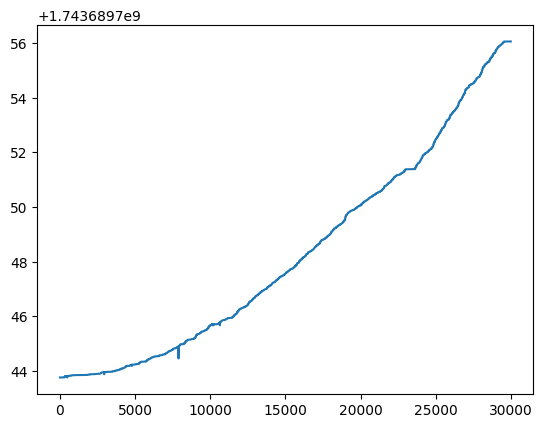

In [109]:
plt.plot(df.timestamp)

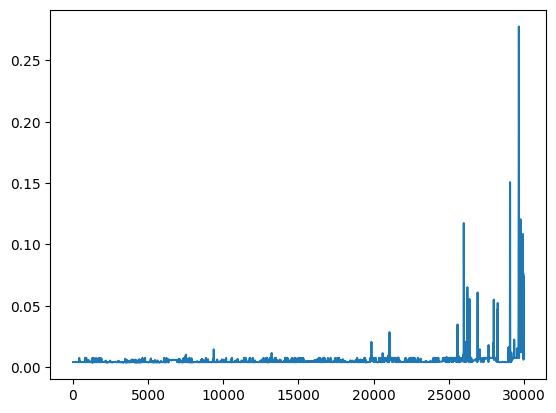

In [112]:
plt.plot(df[['timestamp', 'loss_before']].sort_values(by='timestamp', ascending=False).reset_index(drop=True)['loss_before'].rolling(window=10).mean())  # .sort_values(ascending=False).reset_index(drop=True)
# plt.ylim(0, 2)
# plt.yscale('log')

## Structural difference quantification